**LAB-4 Computer Vision (CV)**

*   Mudasir
*   22K-8732
*   FAST NUCES
*   Octuber 4, 2025

Saving istockphoto_human.jpg to istockphoto_human (5).jpg


Text(0.5, 1.0, 'Main Image')

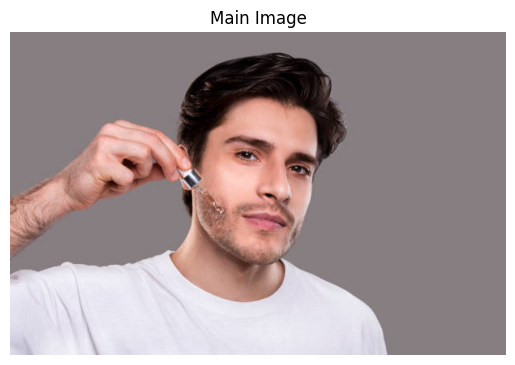

In [23]:
# Upload an Image that will use in tasks

from google.colab import files
import cv2, numpy as np, matplotlib.pyplot as plt

uploaded = files.upload()
fname = next(iter(uploaded))
img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Main Image")

Text(0.5, 1.0, 'Harris Corners')

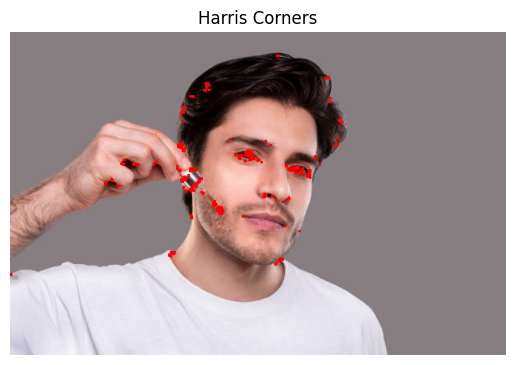

In [24]:
# 1. Harris Corner Detection

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

img_harris = img.copy()
img_harris[dst > 0.01 * dst.max()] = [0,0,255]

plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Harris Corners")

Saving Profile Image.png to Profile Image (1).png


Text(0.5, 1.0, 'Shi-Tomasi Corners')

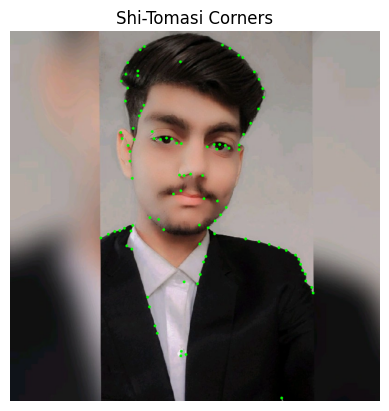

In [19]:
# 2. Shi-Tomasi Corner Detection (new image upload)

uploaded = files.upload()
fname = next(iter(uploaded))
img2 = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray2, 100, 0.01, 10)

img_shi = img2.copy()
for c in corners:
    x,y = c.ravel()
    cv2.circle(img_shi, (int(x),int(y)), 3, (0,255,0), -1)

plt.imshow(cv2.cvtColor(img_shi, cv2.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Shi-Tomasi Corners")

Saving istockphoto_glasses_human.jpg to istockphoto_glasses_human (7).jpg


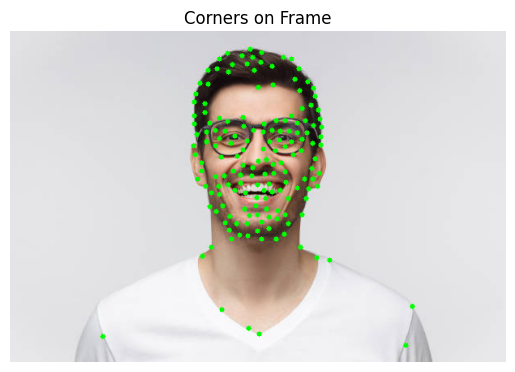

In [26]:
# 4. Real-time (upload another image)

# For Colab: upload another image and treat it as "frame"
uploaded = files.upload()
fname = next(iter(uploaded))
frame = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1)

# Check if the frame was successfully decoded as an image
if frame is not None:
    grayf = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(grayf, 200, 0.01, 10)

    out = frame.copy()
    if corners is not None:
      for c in corners:
          x,y = c.ravel()
          cv2.circle(out, (int(x),int(y)), 3, (0,255,0), -1)

    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.axis("off"); plt.title("Corners on Frame")
else:
    print("Could not decode the uploaded file as an image. Please upload an image file.")

In [30]:
# 5. Simple Image Stitching

uploaded = files.upload()
imgs = []
for fname in uploaded:
    imgs.append(cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1))

stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch(imgs)

if status == cv2.Stitcher_OK:
    plt.imshow(cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB))
    plt.axis("off"); plt.title("Stitched Panorama")

Saving istockphoto_glasses_human.jpg to istockphoto_glasses_human (9).jpg
Saving istockphoto_human.jpg to istockphoto_human (8).jpg


Saving Image_Pose-1.jpg to Image_Pose-1.jpg
Saving Image_Pose-2.jpg to Image_Pose-2.jpg


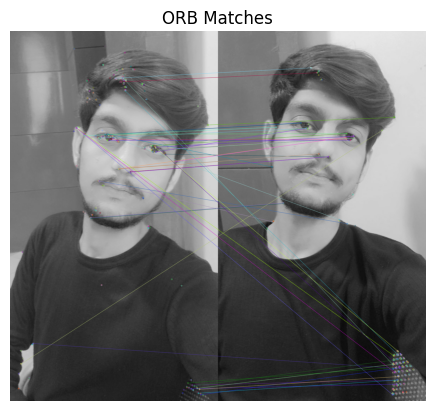

In [32]:
# 6. ORB Feature Matching

uploaded = files.upload()
imgs = []
for fname in uploaded:
    imgs.append(cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 0))

if len(imgs) >= 2:
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(imgs[0], None)
    kp2, des2 = orb.detectAndCompute(imgs[1], None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x:x.distance)[:50]

    out = cv2.drawMatches(imgs[0], kp1, imgs[1], kp2, matches, None)
    plt.imshow(out); plt.axis("off"); plt.title("ORB Matches")
else:
    print("Please upload at least two images for ORB Feature Matching.")

Saving istockphoto_human.jpg to istockphoto_human (9).jpg


Text(0.5, 1.0, 'Detected Regions')

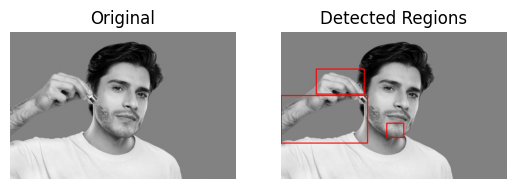

In [33]:
# 7. Tumor Detection (simple edge + contour)

uploaded = files.upload()
fname = next(iter(uploaded))
med = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 0)

edges = cv2.Canny(med, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

out = cv2.cvtColor(med, cv2.COLOR_GRAY2BGR)
for c in contours:
    if cv2.contourArea(c) > 200:  # filter small
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(out,(x,y),(x+w,y+h),(0,0,255),2)

plt.subplot(1,2,1); plt.imshow(med, cmap="gray"); plt.axis("off"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(out[:,:,::-1]); plt.axis("off"); plt.title("Detected Regions")